**BRAIN TUMOR CLASSIFICATION USING TRANSFER LEARNING(RESNET50)**

IMPORTING HISTOGRAM EQUALISED IMAGES AND CORRESPONDING LABELS
 

In [ ]:
import numpy as np
data=np.load('/content/drive/MyDrive/imagesComplete.npy', allow_pickle="true")
labels=np.load('/content/labels100 (1).npy', allow_pickle="true")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


IMPORTING REQUIRED LIBRARIES


In [ ]:
from keras import Sequential
#importing other required libraries
import numpy as np
import pandas as pd
from sklearn.utils.multiclass import unique_labels
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import itertools
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras import Sequential
from keras.applications import VGG19, VGG16, ResNet50
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import SGD,Adam
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout
from keras.utils import to_categorical
import tensorflow as tf
import random

In [ ]:
data=np.asarray(data)

In [ ]:
labels=np.asarray(labels)

IMAGES HAVING SIZE OTHER THAN 512x512 HAVE TO BE DELETED 

In [ ]:
for i in range(3064):
  if(data[i].shape[0]!=512):
    print(i)


1003
1004
1005
1008
1009
1010
1011
1134
1136
1138
1139
1141
2890
2891
2892


In [ ]:
data = np.delete(data, [1003,1004,1005,1008,1009,1010,1011,1134,1136,1138,1139,1141,2890,2891,2892], axis=0)
labels = np.delete(labels, [1003,1004,1005,1008,1009,1010,1011,1134,1136,1138,1139,1141,2890,2891,2892], axis=0)

IMAGE PREPROCESSING, SO AS TO FEED INTO THE TRANSFER LEARNING MODELS
STEPS:

1.FLATTENING THE IMAGE

2.REDUCING PIXELS SO THAT WE CAN CONVERT A MONOCHROME IMAGE TO RGB.

3.RESHAPING INTO A 3-DIMENSIONAL IMAGE


In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
for i in range(3049):
  data[i]=data[i].flatten()
  data[i]=data[i][:261075]
  data[i]=data[i].reshape((295,295,3))
  data[i]=preprocess_input(data[i])

In [ ]:
#for i in range(2290,3064):
 # data[i]=data[i].flatten()
  #data[i]=data[i][:261075]
  #data[i]=data[i].reshape((295,295,3))
  #data[i]=preprocess_input(data[i])

In [ ]:
a=tf.keras.utils.to_categorical(labels, num_classes=4)

In [ ]:
a=np.delete(a, 0, 1)


In [ ]:
2290-2030


260

Randomly generating test-set and training-set

In [ ]:
d=[]
for i in range(3049):
  if i%5!=0:
    p=data[i].reshape(295,295,3)
    d.append(p)

  

In [ ]:
l=[]
for i in range(3049):
  if i%5!=0:
    l.append(a[i])


In [ ]:
test_i=[]
for i in range(3049):
  if i %5 ==0 :
    p=data[i].reshape(295,295,3)
    test_i.append(p)



In [ ]:
test_c=[]
for i in range(3049):
  if i %5 ==0 :
    test_c.append(labels[i])

In [ ]:
test_i=np.asarray(test_i)
test_c=np.asarray(test_c)
np.save("TESTI_80_20.npy",test_i)
np.save("TESTC_80_20.npy",test_c)

In [ ]:
#import numpy as np
#data=np.load('/content/TESTI_80_20.npy')
#labels=np.load('/content/TESTC_80_20.npy')

In [ ]:
d=np.asarray(d)
l=np.asarray(l)
l.shape

(2439, 3)

In [ ]:
d.shape

(2439, 295, 295, 3)

Model-:

In [ ]:
from keras.applications import VGG19, VGG16, ResNet50
from keras.models import Model
from keras.layers import Input
from keras.layers import AveragePooling2D
baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(295,295, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
for layer in baseModel.layers:
	layer.trainable = False


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
INIT_LR = 1e-4
EPOCHS =10
BS = 32
opt = SGD(lr=1e-4, momentum=0.9)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

In [ ]:
(x_train, x_val, trainY, testY) = train_test_split(d,l,test_size=0.20, random_state=42)

Training of the model

In [ ]:
H = model.fit(x_train, trainY, batch_size=11,steps_per_epoch=len(x_train)//11,validation_data=(x_val, testY),validation_steps=len(x_val)//11 ,epochs=40)

Epoch 1/40
177/177 [==============================] - 53s 229ms/step - loss: 0.7105 - accuracy: 0.4131 - val_loss: 0.5986 - val_accuracy: 0.5041
Epoch 2/40
177/177 [==============================] - 40s 224ms/step - loss: 0.5372 - accuracy: 0.6145 - val_loss: 0.4798 - val_accuracy: 0.6880
Epoch 3/40
177/177 [==============================] - 41s 231ms/step - loss: 0.4967 - accuracy: 0.6441 - val_loss: 0.4361 - val_accuracy: 0.7273
Epoch 4/40
177/177 [==============================] - 42s 236ms/step - loss: 0.4607 - accuracy: 0.6721 - val_loss: 0.4108 - val_accuracy: 0.7376
Epoch 5/40
177/177 [==============================] - 41s 233ms/step - loss: 0.4299 - accuracy: 0.7040 - val_loss: 0.3807 - val_accuracy: 0.7521
Epoch 6/40
177/177 [==============================] - 41s 234ms/step - loss: 0.3946 - accuracy: 0.7512 - val_loss: 0.4066 - val_accuracy: 0.7169
Epoch 7/40
177/177 [==============================] - 41s 233ms/step - loss: 0.3820 - accuracy: 0.7584 - val_loss: 0.3565 - val_ac

Accuracy achieved 98.73% on training set and approx 84% on test set.

In [ ]:
model.save("model_80_20.h5")

In [ ]:
test_i=np.asarray(test_i)

test_i.shape

(610, 295, 295, 3)

In [ ]:
test_c=np.asarray(test_c)


In [ ]:
test_c.shape

(610, 1)

In [ ]:
k=[]
for i in test_c:
  if i==1:
    k.append(0)
  if i==2:
    k.append(1)
  if i==3:
    k.append(2)
k=np.asarray(k)     

In [ ]:
print(k)


In [ ]:
from sklearn.metrics import classification_report

y_pred = model.predict(test_i, batch_size=64, verbose=0)
y_pred_bool = np.argmax(y_pred, axis=1)

print(classification_report(k, y_pred_bool))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       142
           1       0.86      0.80      0.83       285
           2       0.78      0.84      0.81       183

    accuracy                           0.83       610
   macro avg       0.82      0.83      0.83       610
weighted avg       0.83      0.83      0.83       610



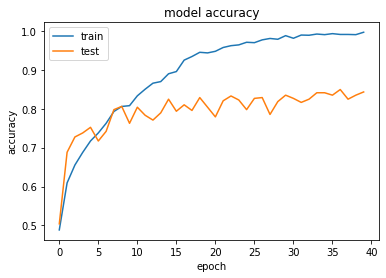

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**CONCLUSION**

We finally achieved a good accuracy of 84.30% on test set and with histogram equilisation image enhancement technique. 

